# Predicting the sale price 

## 1. Problem defition
We want to predict the future sale price of a bulldozer, given  its characteristics and previous examples of how much similar bulldozers have been sold for.

## 2. Data

data source: https://www.kaggle.com/c/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.


* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.


* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features

In [1]:
import pandas as pd
features = pd.read_excel("data/Data Dictionary.xlsx")  
del features["Unnamed: 2"]
features

C:\Users\anton\Desktop\back\back_laptop\python\machine_learning\Sales_price_prediction\env\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Variable,Description
0,SalesID,unique identifier of a particular sale of a ...
1,MachineID,identifier for a particular machine; machin...
2,ModelID,identifier for a unique machine model (i.e. ...
3,datasource,source of the sale record; some sources are...
4,auctioneerID,"identifier of a particular auctioneer, i.e. ..."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...
7,UsageBand,"value (low, medium, high) calculated compari..."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


In [3]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

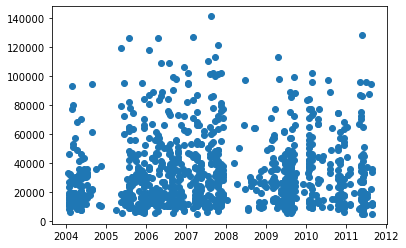

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

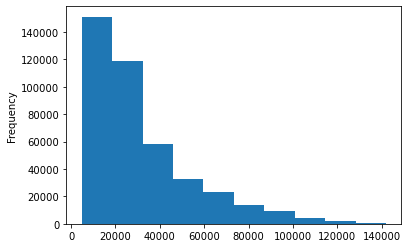

In [7]:
df.SalePrice.plot.hist();

In [8]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [9]:
# make a copy of dataframe
df_tmp = df.copy()

### Add datetime parameters for saledata column 

In [10]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek 
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [11]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [12]:
# chech the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

### convert data into numbers

In [21]:
# which column contains strings
for key, value in df_tmp.items():
    if pd.api.types.is_string_dtype(value):
        print(key)
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
for key, value in df_tmp.items():
    if pd.api.types.is_string_dtype(value):
        df_tmp[key] = value.astype("category").cat.as_ordered()

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

### manipulate missing data

In [30]:
for key, value in df_tmp.items():
    if pd.api.types.is_numeric_dtype(value):
        print(key) 

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [31]:
# fill the numeric missing values with median
for key, value in df_tmp.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            df_tmp[key + "_is_missing"] = pd.isnull(value)
            df_tmp[key] = value.fillna(value.median())
        

In [32]:
# check for any null numeric values
for key, value in df_tmp.items():
     if pd.api.types.is_numeric_dtype(value):
            if pd.isnull(value).sum():
                print(key)

In [36]:
# fill the categorial missing values
for key, value in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(value):
        print(key)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [42]:
for key, value in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(value):
        df_tmp[key + "_is_missing"] = pd.isnull(value)
        df_tmp[key] = pd.Categorical(value).codes + 1

In [47]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### build the machine learning model

In [57]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=2)

X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]

model.fit(X,y)

CPU times: total: 22min 57s
Wall time: 3min 25s


RandomForestRegressor(n_jobs=-1, random_state=2)

In [58]:
# score the model (coefficient of determination)
model.score(X, y)

0.9875855808146402

### Splitting data into train/validation sets

In [60]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [61]:
# split into X and y
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

X_val = df_val.drop("SalePrice", axis=1)
y_val = df_val["SalePrice"]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [80]:
# RMSLE
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
        Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores
    


## Tuning hyperparameters

In [75]:
# reduce data for time experiment
model = RandomForestRegressor(n_jobs=-1, random_state=2, max_samples=10000)

model.fit(X_train, y_train)


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=2)

In [81]:
show_scores(model)

{'Training MAE': 5567.383629442193,
 'Valid MAE': 7184.613960943576,
 'Training RMSLE': 0.25799823586969256,
 'Valid RMSLE': 0.2939149999855614,
 'Training R^2': 0.8602028597913625,
 'Valid R^2': 0.8332175353133906}

In [89]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=2), 
                              param_distributions=rf_grid, n_iter=100, cv=5, verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 26min 53s
Wall time: 35min 19s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=2),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [91]:
# evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 5722.750668545794,
 'Valid MAE': 7256.330478754507,
 'Training RMSLE': 0.2633599665469018,
 'Valid RMSLE': 0.29449220132460735,
 'Training R^2': 0.850743969628341,
 'Valid R^2': 0.8248537641734628}

### Train a model with the best hyperparameters


In [97]:
best_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=2)

best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=2)

In [98]:
# Valid RMSLE: 0.2455521946273049
show_scores(best_model)

{'Training MAE': 2953.041028873544,
 'Valid MAE': 5920.403635700959,
 'Training RMSLE': 0.14462004816713497,
 'Valid RMSLE': 0.2455521946273049,
 'Training R^2': 0.9589793941415604,
 'Valid R^2': 0.8827859377685051}

## Make predictions on test data

In [101]:
# import test data
df_test = pd.read_csv("data/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [105]:
# data manipulation
def manipulate_data(df):
    
    # Add datetime parameters for saledata column
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek 
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # fill the numeric missing values with median
    for key, value in df.items():
        if pd.api.types.is_numeric_dtype(value):
            if pd.isnull(value).sum():
                df[key + "_is_missing"] = pd.isnull(value)
                df[key] = value.fillna(value.median())
    
    # fill categorical missing values and convert into numbers
    for key, value in df.items():
        if not pd.api.types.is_numeric_dtype(value):
            df[key + "_is_missing"] = pd.isnull(value)
            df[key] = pd.Categorical(value).codes + 1
    
    return df

In [106]:
df_test = manipulate_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [107]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
df_test["auctioneerID_is_missing"] = False

In [114]:
# make preds
test_preds = best_model.predict(df_test)
test_preds

C:\Users\anton\Desktop\back\back_laptop\python\machine_learning\Sales_price_prediction\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([19565.87944223, 17899.85226153, 49980.12217712, ...,
       17972.96706755, 24403.88890076, 32967.32773729])

In [117]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19565.879442
1,1227844,17899.852262
2,1227847,49980.122177
3,1227848,63150.530279
4,1227863,44404.542047
...,...,...
12452,6643171,47600.971550
12453,6643173,20096.399108
12454,6643184,17972.967068
12455,6643186,24403.888901


### Feature Importance

In [118]:
best_model.feature_importances_

array([3.40491361e-02, 1.52402631e-02, 4.43034060e-02, 1.85963334e-03,
       3.33283206e-03, 1.95988825e-01, 3.15742690e-03, 1.02091364e-03,
       4.59515016e-02, 4.94992374e-02, 6.71772145e-02, 4.62252493e-03,
       2.28219336e-02, 1.35152391e-01, 4.53127003e-02, 5.97772379e-03,
       2.43615657e-03, 4.28653643e-03, 2.57249747e-03, 7.30092623e-02,
       7.05784451e-04, 7.27566472e-04, 1.06816317e-03, 1.96129613e-04,
       9.71616593e-04, 1.95857281e-05, 4.90260099e-04, 4.62197435e-03,
       2.27499346e-03, 5.63084264e-04, 5.22980607e-03, 2.69616236e-03,
       2.93684827e-03, 3.68458424e-03, 2.27093479e-03, 1.12901926e-02,
       9.56453992e-04, 1.03558143e-02, 2.09367667e-03, 4.52035373e-04,
       1.43333508e-03, 1.01392991e-03, 2.98340654e-03, 5.83130800e-04,
       5.70384509e-04, 3.14888893e-04, 4.06404536e-04, 1.94950017e-03,
       1.49844623e-03, 1.49936798e-04, 1.76097777e-04, 7.26834874e-02,
       3.84470489e-03, 5.72606999e-03, 2.92673015e-03, 9.83806924e-03,
      

In [125]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
    

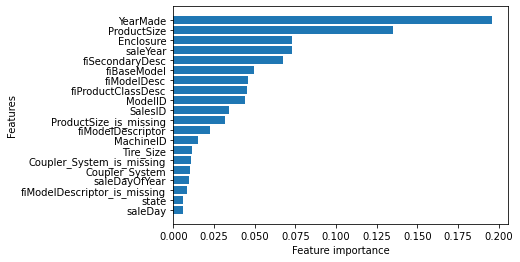

In [126]:
plot_features(X_train.columns, best_model.feature_importances_)